In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("glass data short.csv")

In [3]:
df.head()

,1.52777,12.64,0,0.67,72.02,0.06,14.4,0.1,0.2,2
0,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
1,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
2,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
3,1.52020,13.98,1.35,1.63,71.76,0.39,10.56,0.00,0.18,2
4,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1


Attribute Information:

    . RI: refractive index
    . Na: Sodium (unit measurement: weight percent in corresponding oxide)
    . Mg: Magnesium
    . Al: Aluminum
    . Si: Silicon
    . K: Potassium
    . Ca: Calcium
    . Ba: Barium
    . Fe: Iron

Type of glass: (class attribute)

    . Window:
    -- 1 building_windows_float_processed 
    -- 2 building_windows_non_float_processed 

    . Non-Window:
    -- 6 tableware

In [4]:
df.columns = ["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe", "glass_type"]

In [5]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
1,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
2,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
3,1.52020,13.98,1.35,1.63,71.76,0.39,10.56,0.00,0.18,2
4,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1


In [7]:
df.glass_type.unique()

#df['glass_type'].unique()

array([1, 2, 6], dtype=int64)

In [8]:
df.shape

(173, 10)

### Standardize the Data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #instantiate

features = ["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]

x = df.loc[: , features]
x.head()

,ri,na,mg,al,si,k,ca,ba,fe
0,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
1,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00
2,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00
3,1.52020,13.98,1.35,1.63,71.76,0.39,10.56,0.00,0.18
4,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00


In [14]:
scaler.fit(x)
X_scaled = scaler.transform(x)
X_scaled

array([[ 0.24775918,  0.65362608,  0.51343236, ..., -0.041788  ,
        -0.17516533, -0.64641076],
       [ 0.00980033, -0.32140248,  0.01409701, ...,  0.17728242,
        -0.38560701, -0.64641076],
       [ 2.99089599, -3.07748319, -2.04113835, ...,  4.62667812,
        -0.38560701, -0.64641076],
       ...,
       [-0.64128154, -1.08842494,  0.47724864, ..., -0.57057866,
        -0.38560701,  0.31763287],
       [ 2.75293714,  0.78362989,  0.63645701, ...,  0.74384384,
        -0.38560701,  0.42474883],
       [-0.80653075, -0.47740704,  0.54961608, ..., -0.66122849,
        -0.38560701, -0.64641076]])

In [15]:
len(X_scaled)

173

## Applying PCA (Principal Component Analysis)

###  Is there any way to reduce the dimension of the feature space?

    .  We know that in a data-set there are high possibilities for some features to be correlated.
    
    . PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated)

In [18]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Let's check the shape of the PCA array

print("shape of X_pca", X_pca.shape)

shape of X_pca (173, 9)


In [19]:
# check by measuring the variance ratio of the principal component

ex_variance = np.var(X_pca, axis=0)
ex_variance_ratio = ex_variance / np.sum(ex_variance)

print(ex_variance_ratio)

[3.00266176e-01 2.83314665e-01 1.39550409e-01 1.03067054e-01
 8.71544404e-02 4.71738696e-02 3.23478121e-02 6.97662552e-03
 1.48948327e-04]


In [20]:
print(sum(ex_variance_ratio))

1.0000000000000002


In [21]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([30. , 58.3, 72.3, 82.6, 91.3, 96. , 99.2, 99.9, 99.9])

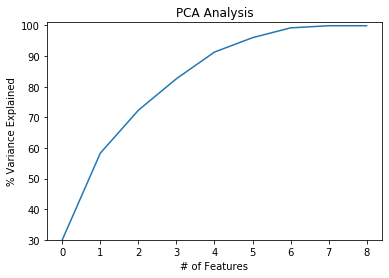

In [23]:
import matplotlib.pyplot as plt

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30, 101)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [38]:
pca = PCA(n_components = 5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Let's check the shape of the PCA array

print("shape of X_pca", X_pca.shape)

shape of X_pca (173, 5)


In [39]:
# The eigenvectors:
# These are eigenvectors of the covariance matrix
print('Eigenvector : \n', pca.components_)
print('number of Eigenvectors : \n', len(pca.components_))

Eigenvector : 
 [[ 0.4960288  -0.28798885  0.19380612 -0.45371718 -0.35077144 -0.06874347
   0.42763626 -0.27556756  0.202537  ]
 [ 0.31054812  0.32076308 -0.50197184  0.2127826  -0.21984991 -0.41344522
   0.34665325  0.40125594 -0.05452533]
 [-0.01631026 -0.51950439 -0.36890901  0.23065779  0.3694413   0.24896089
   0.27408661  0.13405144  0.49898961]
 [ 0.07581132  0.12253593  0.17596106  0.18007941 -0.57661217  0.41297042
  -0.27184786  0.37316639  0.44684015]
 [ 0.2377961  -0.27687528 -0.10787065  0.00597625 -0.08660649  0.55017753
   0.09422181  0.24338461 -0.69051538]]
number of Eigenvectors : 
 5


In [40]:
# The eigenvalues associated with the eigenvectors
eigenvalues = pca.explained_variance_
print("Eigenvalues :\n", eigenvalues)

Eigenvalues :
 [2.71810719 2.56465659 1.26325574 0.93299653 0.78895037]


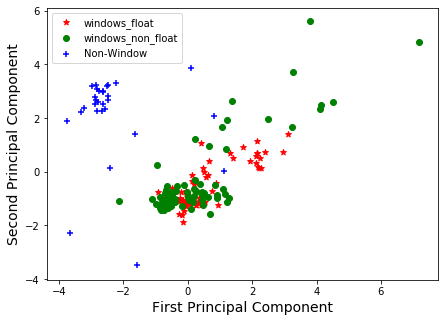

In [41]:
Xax = X_pca[:, 0]
Yax = X_pca[:, 1]

labels = df.glass_type
dictionary = {1:'red', 2:'green', 6:'blue'}
label = {1:'windows_float', 2:'windows_non_float', 6:'Non-Window'}
marker = {1:'*', 2:'o', 6:'+'}

fig, ax = plt.subplots(figsize=(7,5))
for i in np.unique(labels):
    ix = np.where(labels == i)
    ax.scatter(Xax[ix], Yax[ix], c=dictionary[i],
              label= label[i], marker=marker[i])


plt.xlabel("First Principal Component", fontsize=14)
plt.ylabel("Second Principal Component", fontsize=14)
plt.legend()
plt.show()
